In [557]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import median, mean

In [558]:
data = pd.read_csv('C:/Users/Arcry/Test_funbox/event_sample.csv', delimiter=';', header=None)

In [559]:
data.columns = ['id', 'time', 'longitude', 'latitude']

In [560]:
data['time'] = pd.to_datetime(data['time'])
data.index = data['time']

In [561]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1727040 entries, 2017-03-20 00:00:18+03:00 to 2017-03-21 00:00:00+03:00
Data columns (total 4 columns):
 #   Column     Dtype                                
---  ------     -----                                
 0   id         int64                                
 1   time       datetime64[ns, pytz.FixedOffset(180)]
 2   longitude  float64                              
 3   latitude   float64                              
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), float64(2), int64(1)
memory usage: 65.9 MB


In [606]:
ids = data['id'].unique()

In [563]:
data.isna().sum()

id           0
time         0
longitude    0
latitude     0
dtype: int64

In [564]:
# http://www.movable-type.co.uk/scripts/latlong.html
# функция для вычисления расстояния между двумя координатами
from math import radians, cos, sin, asin, sqrt, atan2
def haversine(x):
    # конвертируем значения градусов в радианы 
    lon1, lat1, lon2, lat2 = map(radians, [x['min_longitude'], x['min_latitude'], x['max_longitude'], x['max_latitude']])
    # формула для вычисления расстояния с использоанием гаверсинуса
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Радиус Земли в километрах равен 6371
    km = 6371* c 
    return km

Возьмем за нахождение дома промежуток времени с 21:00 до 07:00.

In [565]:
# Необходимо разбить на два промежутка временной диапазон
# Рассмотрим время с 00:01 до 07:00

data_nigth = data.between_time('00:01', '07:00')
# посчитаем количество часов проведенных дома в это время
night_hours = pd.DataFrame(data_nigth.groupby('id')['time'].max() -
                           data_nigth.groupby('id')['time'].min())['time']\
                           / np.timedelta64(1, 'h')
# определим максимаьные, минимальные и медианные координаты пользователя за этот
# промежуток времени 
max_coord_night = data_nigth.groupby('id')['longitude', 'latitude']\
                            .agg(max).reset_index()\
                            .rename(columns={'longitude': 'max_longitude', 
                                             'latitude': 'max_latitude'})
min_coord_night = data_nigth.groupby('id')['longitude', 'latitude']\
                            .agg(min).reset_index()\
                            .rename(columns={'longitude': 'min_longitude', 
                                             'latitude': 'min_latitude'})
median_coord_night = data_nigth.groupby('id')['longitude', 'latitude']\
                            .agg('median').reset_index()\
                            .rename(columns={'longitude': 'median_longitude', 
                                             'latitude': 'median_latitude'})
nigth_coords = max_coord_night.merge(min_coord_night, on='id').merge(median_coord_night, on='id')
# объединим полученную информацию в одну таблицу
night = nigth_coords.merge(night_hours, on='id')


c:\users\arcry\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()
c:\users\arcry\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app
c:\users\arcry\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [566]:
# Рассмотрим время с 21:00 до 23:59
data_night_bef_midnight = data.between_time('21:00', '23:59')
night_hours_bef_midnigh = pd.DataFrame(data_night_bef_midnight.groupby('id')['time'].max() -
                           data_night_bef_midnight.groupby('id')['time'].min())['time']\
                           / np.timedelta64(1, 'h')
# определим максимаьные, минимальные и средние координаты каждого пользователя 
# за этот промежуток времени 
max_coord_night_bef_midnight = data_night_bef_midnight.groupby('id')['longitude', 'latitude']\
                            .agg(max).reset_index()\
                            .rename(columns={'longitude': 'max_longitude', 
                                             'latitude': 'max_latitude'})
min_coord_night_bef_midnight = data_night_bef_midnight.groupby('id')['longitude', 'latitude']\
                            .agg(min).reset_index()\
                            .rename(columns={'longitude': 'min_longitude', 
                                             'latitude': 'min_latitude'})
median_coord_night_bef_midnight = data_night_bef_midnight.groupby('id')['longitude', 'latitude']\
                            .agg('median').reset_index()\
                            .rename(columns={'longitude': 'median_longitude', 
                                             'latitude': 'median_latitude'})
night_coords_bef_midnight  = max_coord_night_bef_midnight.merge(min_coord_night_bef_midnight, on='id').merge(median_coord_night_bef_midnight, on='id')
# объединим полученную информацию в одну таблицу
night_bef_midnight = night_coords_bef_midnight.merge(night_hours_bef_midnigh, on='id')


c:\users\arcry\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
c:\users\arcry\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':
c:\users\arcry\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


In [567]:
# объединим всю информацию о пользователях за всю ночь 
all_night = night.merge(night_bef_midnight, on='id', how='left')

In [568]:
# выделим необходимые данные из полученной таблицы
all_night['max_longitude'] = all_night[["max_longitude_x", "max_longitude_y"]].max(axis=1)
all_night['max_latitude'] = all_night[["max_latitude_x", "max_latitude_y"]].max(axis=1)
all_night['min_longitude'] = all_night[["min_longitude_x", "min_longitude_y"]].min(axis=1)
all_night['min_latitude'] = all_night[["min_latitude_x", "min_latitude_y"]].min(axis=1)
all_night['median_longitude'] = all_night[["median_longitude_x", "median_longitude_y"]].median(axis=1)
all_night['median_latitude'] = all_night[["median_latitude_x", "median_latitude_y"]].median(axis=1)
all_night['time'] = all_night[["time_x", "time_y"]].sum(axis=1)
#  посчитаем расстояния
all_night['dist'] = all_night.apply(haversine, axis=1)

In [569]:
all_night = all_night[['id', 'time', 'max_longitude', 'max_latitude', 'min_longitude', 
           'min_latitude', 'median_longitude', 'median_latitude', 'dist']]

<AxesSubplot:ylabel='Frequency'>

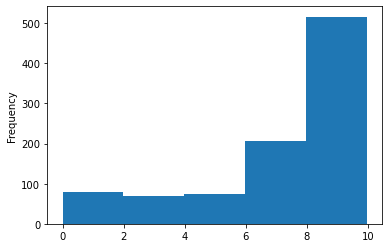

In [570]:
# посмотрим распределение часов проведенных пользователями ночью дома
all_night['time'].plot.hist(bins=5)

(0.0, 20.0)

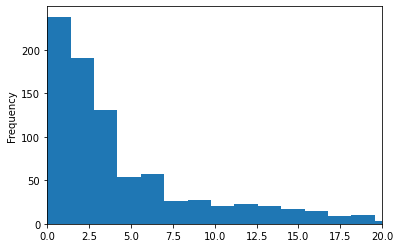

In [571]:
# посмотрим распределение расстояний, которые изменялись у пользователей за ночь
all_night['dist'].plot.hist(bins= 2500)
plt.xlim(0, 20)

Отфильтруем данные в соответствии с графиками, часы > 1.5 часов, расстояния < 7 км (с учетом погрешности местоопределения в помещении, раннего ухода/позднего прихода)

In [572]:
home = all_night[(all_night['time'] >= 1.5) & (all_night['dist'] < 7)]

In [573]:
# аналогично получим данные для рабочего времени с 10:00 до 18:00 
# (в среднем в это время большинство людей находится на работе)
data_day = data.between_time('10:00', '18:00')
day_hours = pd.DataFrame(data_day.groupby('id')['time'].max() -
                           data_day.groupby('id')['time'].min())['time']\
                           / np.timedelta64(1, 'h')
max_coord_day = data_day.groupby('id')['longitude', 'latitude']\
                            .agg(max).reset_index()\
                            .rename(columns={'longitude': 'max_longitude', 
                                             'latitude': 'max_latitude'})
min_coord_day = data_day.groupby('id')['longitude', 'latitude']\
                            .agg(min).reset_index()\
                            .rename(columns={'longitude': 'min_longitude', 
                                             'latitude': 'min_latitude'})
median_coord_day = data_day.groupby('id')['longitude', 'latitude']\
                            .agg('median').reset_index()\
                            .rename(columns={'longitude': 'median_longitude', 
                                             'latitude': 'median_latitude'})
day_coords = max_coord_day.merge(min_coord_day, on='id').merge(median_coord_day, on='id')
day = day_coords.merge(day_hours, on='id')
day['dist'] = day.apply(haversine, axis=1)

c:\users\arcry\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys
c:\users\arcry\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()
c:\users\arcry\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


<AxesSubplot:ylabel='Frequency'>

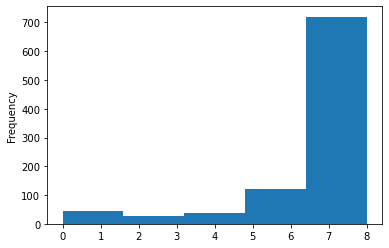

In [574]:
# посмотрим распределение часов проведенных пользователями днем на работе
day_hours.plot.hist(bins=5)

(0.0, 20.0)

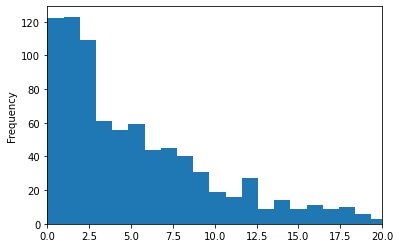

In [575]:
# посмотрим распределение расстояний, которые изменялись у пользователей за ночь
day['dist'].plot.hist(bins= 500)
plt.xlim(0, 20)

Отфильтруем данные в соответствии с графиками, часы > 2 часов, расстояния < 10 км (с учетом погрешности местоопределения в помещении)

In [576]:
work = day[(day['time'] >= 2) & (day['dist'] < 10)]

In [577]:
# объединим информацию за день и ночь
df = home.merge(work, on='id')
df.head()

,id,time_x,max_longitude_x,max_latitude_x,min_longitude_x,min_latitude_x,median_longitude_x,median_latitude_x,dist_x,max_longitude_y,max_latitude_y,min_longitude_y,min_latitude_y,median_longitude_y,median_latitude_y,time_y,dist_y
0,2,9.829444,38.940334,47.214460,38.928703,47.206815,38.938606,47.209599,1.222513,38.940323,47.228889,38.906093,47.201989,38.938130,47.209372,7.804444,3.953583
1,4,9.906667,47.153826,42.822272,47.109504,42.784932,47.121719,42.812230,5.505763,47.165216,42.822346,47.110006,42.768954,47.123030,42.813048,7.977500,7.452513
2,5,7.254722,158.635300,53.077955,158.597147,53.055120,158.608927,53.068263,3.598024,158.634022,53.069652,158.595042,53.056002,158.613087,53.068434,2.173611,3.014694
3,6,9.511389,104.300663,52.258638,104.240612,52.222479,104.259045,52.252631,5.734566,104.295569,52.291269,104.232849,52.247617,104.259008,52.252755,7.732222,6.463355
4,9,8.510833,39.697043,47.274640,39.684324,47.252271,39.688910,47.268071,2.666058,39.691806,47.275609,39.684423,47.257685,39.687834,47.268546,7.320833,2.069533


In [578]:
# исключим и переименуем нужные столбцы в таблице 
home_work = df.drop(columns=['min_longitude_x', 'min_latitude_x', 'max_longitude_y', 'max_latitude_y',
                            'max_longitude_x', 'max_latitude_x', 'min_longitude_y', 'min_latitude_y'])\
                .rename(columns={'median_longitude_x': 'max_longitude',
                                'median_latitude_x': 'max_latitude',
                                'median_longitude_y': 'min_longitude',
                                'median_latitude_y': 'min_latitude'})
home_work.head()

,id,time_x,max_longitude,max_latitude,dist_x,min_longitude,min_latitude,time_y,dist_y
0,2,9.829444,38.938606,47.209599,1.222513,38.938130,47.209372,7.804444,3.953583
1,4,9.906667,47.121719,42.812230,5.505763,47.123030,42.813048,7.977500,7.452513
2,5,7.254722,158.608927,53.068263,3.598024,158.613087,53.068434,2.173611,3.014694
3,6,9.511389,104.259045,52.252631,5.734566,104.259008,52.252755,7.732222,6.463355
4,9,8.510833,39.688910,47.268071,2.666058,39.687834,47.268546,7.320833,2.069533


In [579]:
# рассчитаем расстояния между наиболее частыми координатами (медианные) возле дома и возле работы
home_work['h_w_dist'] = home_work.apply(haversine, axis=1)

(0.0, 5.0)

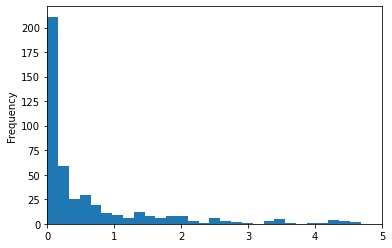

In [580]:
# построим гистрограмму распределния расстояний дом - работа
home_work['h_w_dist'].plot.hist(bins= 300)
plt.xlim(0, 5)

In [583]:
# отфильтруем данные с учетом полученного графика, расстоние дом - работа не менее 1,5 км, 
# и не более 40 км (больше это скорее всего командировка или поездка)

In [40]:
# http://www.movable-type.co.uk/scripts/latlong.html
from math import radians, cos, sin, asin, sqrt, atan2
def haversine_for_id(lon1, lat1, lon2, lat2):
    # конвертируем значения градусов в радианы 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # формула для вычисления расстояния с использоанием гаверсинуса
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Радиус Земли в километрах равен 6371
    km = 6371* c 
    return km

Определим для каждого отделного пользователя:
- перемещение дом-работ - 1
- другое - 0

In [ ]:
# сохранение отдельных файлов с данными пользователями для проверки
for i in range(999):
    list(data.groupby('id'))[i][1].drop(columns=['id']).to_csv(f'C:/Users/Arcry/Test_funbox/id_{i}.csv', sep=';', header=None, index=None)

In [622]:
from tqdm import tqdm
res = []
for i in tqdm(range(973)):
    info = pd.read_csv(f'C:/Users/Arcry/Test_funbox/id_{i}.csv', delimiter=';', header=None)
    info.columns = ['time', 'longitude', 'latitude']
    info['time'] = pd.to_datetime(info['time'])
    info.index = info['time']
    
    night_bm = info.between_time('21:00', '23:59')
    std_night_bm = night_bm['longitude'].std()
    dev_night_bm = (night_bm['longitude'] - night_bm['longitude'].mean()).abs()
    night_bm = night_bm[~(dev_night_bm>1*std_night_bm)]
    max_coords_night_bm = night_bm[['longitude', 'latitude']].max()
    min_coords_night_bm = night_bm[['longitude', 'latitude']].min()
    median_coords_night_bm = night_bm[['longitude', 'latitude']].median()
    night_hour_bm = (night_bm['time'].max() - night_bm['time'].min())/ np.timedelta64(1, 'h')

    night_am = info.between_time('00:01', '07:00')
    std_night_am = night_am['longitude'].std()
    dev_night_am = (night_am['longitude'] - night_am['longitude'].mean()).abs()
    night_am = night_am[~(dev_night_am>1*std_night_am)]
    max_coords_night_am = night_am[['longitude', 'latitude']].max()
    min_coords_night_am = night_am[['longitude', 'latitude']].min()
    median_coords_night_am = night_am[['longitude', 'latitude']].median()
    night_hour_am = (night_am['time'].max() - night_am['time'].min())/ np.timedelta64(1, 'h')

    max_coords_night = [max(max_coords_night_bm[0], max_coords_night_am[0]),
                       max(max_coords_night_bm[1], max_coords_night_am[1])]
    min_coords_night = [min(min_coords_night_bm[0], min_coords_night_am[0]),
                       min(min_coords_night_bm[1], min_coords_night_am[1])]
    median_coords_night = [median([median_coords_night_bm[0], median_coords_night_am[0]]),
                       median([median_coords_night_bm[1], median_coords_night_am[1]])]

    night_hour = night_hour_am + night_hour_bm

    night_dist = haversine_for_id(min_coords_night[0], min_coords_night[1],
                                 max_coords_night[0], max_coords_night[1])



    day = info.between_time('10:00', '18:00')
    std_day = day['longitude'].std()
    dev_day = (day['longitude'] - day['longitude'].mean()).abs()
    day = day[~(dev_day>1*std_day)]
    max_coords_day = day[['longitude', 'latitude']].max()
    min_coords_day = day[['longitude', 'latitude']].min()
    median_coords_day = day[['longitude', 'latitude']].median()

    day_hour = (day['time'].max() - day['time'].min())/ np.timedelta64(1, 'h')
    day_dist = haversine_for_id(min_coords_day[0], min_coords_day[1],
                                 max_coords_day[0], max_coords_day[1])

    dist_home_work = haversine_for_id(median_coords_day[0], median_coords_day[1],
                                 median_coords_night[0], median_coords_night[1])

    if night_hour >= 1.5 and night_dist < 10 and day_hour >= 2 and day_dist < 10 and dist_home_work > 2 and dist_home_work < 40:
#         print('id=', i+2, 'result:', 1)
        res.append(1)
    else:
#         print('id=', i+2, 'result:', 0)
        res.append(0)

# print(night_hour)
# print(night_dist)
# print(day_hour)
# print(day_dist)
# print(dist_home_work)

100%|████████████████████████████████████████████████████████████████████████████████| 973/973 [00:35<00:00, 27.51it/s]


In [619]:
# сохранение полученных результатов
pd.DataFrame({'id': ids, 'result': res}).to_csv('C:/Users/Arcry/Test_funbox/result_of_test_task.csv', sep=';', header=None, index=None)

**Были пристально просмотрены перемещения 200 пользователей, практически все визульные оценки (за исключением одной или двух) совпали с полученным автоматическим результатом**

**Есть ошибки у пользователей, время ухода на работу которых сильно отличается от обычного. Например, работник аэропорта в Якутске, который выходит на работу в 04:30.**